# 3.1 - Más testeo de hipótesis

# ANOVA

### testeo de más de dos muestras

**ANOVA** = Análisis de la varianza, es una técnica que permite comparar tres o más medias de distintas muestras independientes.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3=\ldots=\mu_n$

$H1 :$ Al menos una es diferente

Los p_values se sacan con el F-test (F de Snedecor), comparando varianzas. Lo que se busca es una diferencia significativa en al menos uno de los grupos.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter('ignore')

##### F de Snedecor

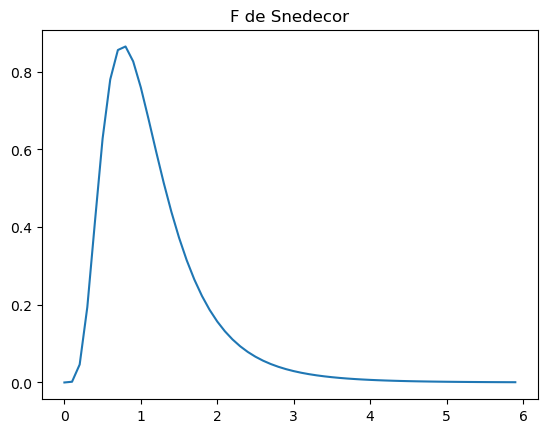

In [2]:
x=[i*.1 for i in range(60)]

plt.plot(x, f(15, 15).pdf(x))
plt.title('F de Snedecor');

In [3]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -3, 1) for x in x]
y2=[norm.pdf(x, 1, 2) for x in x]
y3=[norm.pdf(x, 4, 1.5) for x in x]

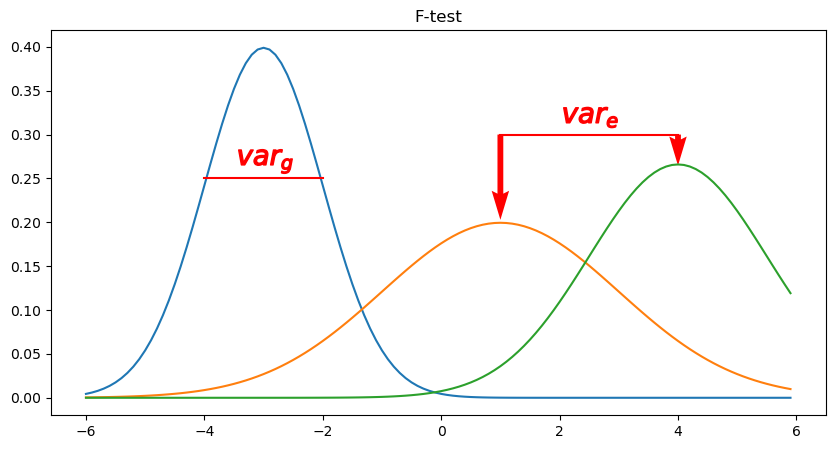

In [4]:
plt.figure(figsize=(10,5))

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.plot(-3, 0.27, marker='$var_g$', color='r', ms=40)
plt.plot(2.5, 0.32, marker='$var_e$', color='r', ms=40)

plt.plot([-4,-3,-2], [.25, .25, .25], color='r')
plt.plot([1,2,3,4], [.3, .3, .3, .3], color='r')

plt.quiver(1, 0.3, 0, -1.1, color='r', scale=10)
plt.quiver(4, 0.3, 0, -0.4, color='r', scale=10)

plt.title('F-test');

$F-test =$ Varianza entre los grupos / Varianza del grupo

$F-test = \frac{\sigma_e^2}{\sigma_g^2}$

### Ejemplo Plantas

**ANOVA One-Way** : Una variable independiente y una dependiente, similaridad basada en la media y en el f_score.


Supongamos que tenemos dos fertilizantes distintos y probamos su eficacia. Se tienen 3 grupos, el grupo de control (no se aplica fertilizante), y un grupo para cada uno de los fertilizantes.

Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3$  (no hay diferencia significativa entre los grupos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un grupo)

**Conclusion**

$p_v < 0.05$, se rechaza H0. Existe una diferencia significativa en al menos un grupo.

### Ejemplo Ciudades

Se tiene un rating de 6 ciudades diferentes.

Las hipótesis son:

$H0 : \mu_1=\ldots=\mu_6$  (no hay diferencia significativa entre las ciudades)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos una ciudad)

**Conclusion**

$p_v < 0.05$, se rechaza H0. Existe una diferencia significativa en al menos una ciudad.

##### F-test a mano

##### con scipy

### Ejemplo Campo


**ANOVA Two-Way** : Dos variables independientes categoricas y una dependiente continua.


Supongamos que se tienen datos de produccion de un campo, y ademas los datos del tipo de fertilizante y cantidad de agua usada.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\ldots=\mu_n$  (no hay diferencia significativa entre campos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un campo)

### MANOVA (ANOVA Multivariante)

### $\chi^2$

**ji-dos, chi-dos, chi-cuadrado...**

**Independencia (H0: Si, H1: No)**

**Conclusion**

$p_v > 0.05$, no se rechaza H0, son independientes.

**para una poblacion que tenga dos variables categoricas**

**¿Existe asociacion significativa entre las dos?  (H0: No, H1: Si)**

**Conclusion**

$p_v > 0.05$, no se rechaza H0, no existe asociacion significativa entre los grupos.